# MLP Test 11

Explorando multiplas rodadas de classificação com diversas possibilidades de valores para camada oculta do `MLPClassifier`

## Importando bibliotecas

In [1]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

## Carregando dados

In [2]:
irisDS = load_iris()

X, y = load_iris(return_X_y=True)

## Explorando 1 camada oculta

In [3]:
# Declarando intervalo dos valores de camada oculta
one_layer_sizes = np.arange(2, 30, 2)

# Declarando array com sementes para reprodutibilidade da distribuição
seed_array1 = np.random.randint(0, 9000, 10)

print(f'seeds: {seed_array1};\nhidden_layer_sizes: {one_layer_sizes};')

# Declarando lista com arrays de acurácia para cada camada
one_layer_acc = []

for hidden_layer in one_layer_sizes:
    # Declarando lista para armazenar acurácias de cada rodada
    acc = []

    # Rodadas de classificação
    for seed in seed_array1:
        # Distribuindo os dados
        X_pre_train, X_pre_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)

        # Instanciando Standard Scaler
        sc = StandardScaler().fit(X_pre_train)

        # Pré-processando dados
        X_train = sc.transform(X_pre_train)
        X_test = sc.transform(X_pre_test)

        # Instanciando e treinando classificador
        classifier = MLPClassifier(
            hidden_layer_sizes=hidden_layer,
            solver='lbfgs',
            activation='tanh'
        ).fit(
            X_train,
            y_train
        )

        # Gerando resultados e adicionando à lista
        acc.append(classifier.score(X_test, y_test))
    
    one_layer_acc.append(acc)

oneLayerDF = pd.DataFrame(
    data=np.array(one_layer_acc),
    index=np.array([f'hls:{hidden_layer}' for hidden_layer in one_layer_sizes])
).transpose()

oneLayerDF

seeds: [3435 1805 6189 5612 1162 5851 3241 4240 1517 3942];
hidden_layer_sizes: [ 2  4  6  8 10 12 14 16 18 20 22 24 26 28];


,hls:2,hls:4,hls:6,hls:8,hls:10,hls:12,hls:14,hls:16,hls:18,hls:20,hls:22,hls:24,hls:26,hls:28
0,0.977778,0.977778,0.977778,0.977778,0.977778,1.000000,0.977778,0.977778,1.000000,1.000000,0.977778,0.977778,0.977778,0.977778
1,0.955556,0.977778,0.955556,0.955556,0.977778,0.977778,0.977778,0.977778,0.977778,0.977778,0.977778,0.977778,0.977778,0.977778
2,0.911111,0.911111,0.911111,0.911111,0.911111,0.911111,0.911111,0.911111,0.911111,0.911111,0.911111,0.911111,0.911111,0.911111
3,0.977778,0.933333,0.955556,0.977778,0.955556,0.933333,0.955556,0.911111,0.933333,0.933333,0.911111,0.911111,0.911111,0.911111
4,0.911111,0.933333,0.933333,0.888889,0.911111,0.911111,0.933333,0.911111,0.933333,0.888889,0.911111,0.911111,0.911111,0.911111
5,0.977778,0.977778,0.977778,0.977778,0.977778,0.977778,0.977778,0.977778,0.977778,0.977778,0.977778,0.977778,0.977778,0.977778
6,0.955556,0.955556,0.977778,0.977778,0.955556,0.933333,0.933333,0.933333,0.977778,0.977778,0.977778,0.977778,0.933333,0.955556
7,0.977778,0.933333,0.977778,0.911111,0.977778,0.911111,0.933333,0.955556,0.977778,0.933333,0.977778,0.911111,0.955556,0.933333
8,0.933333,0.933333,0.955556,0.933333,0.933333,0.955556,0.955556,0.933333,0.933333,0.911111,0.955556,0.955556,0.955556,0.955556
9,0.977778,0.955556,0.933333,0.955556,0.955556,0.933333,0.933333,0.933333,0.977778,0.977778,0.977778,0.933333,0.933333,0.955556


,hls:2,hls:4,hls:6,hls:8,hls:10,hls:12,hls:14,hls:16,hls:18,hls:20,hls:22,hls:24,hls:26,hls:28
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.955556,0.948889,0.955556,0.946667,0.953333,0.944444,0.948889,0.942222,0.960000,0.948889,0.955556,0.944444,0.944444,0.946667
std,0.027716,0.023541,0.023424,0.033457,0.026605,0.031860,0.023541,0.028109,0.029257,0.037843,0.031427,0.031860,0.028207,0.028109
min,0.911111,0.911111,0.911111,0.888889,0.911111,0.911111,0.911111,0.911111,0.911111,0.888889,0.911111,0.911111,0.911111,0.911111
25%,0.938889,0.933333,0.938889,0.916667,0.938889,0.916667,0.933333,0.916667,0.933333,0.916667,0.922222,0.911111,0.916667,0.916667
50%,0.966667,0.944444,0.955556,0.955556,0.955556,0.933333,0.944444,0.933333,0.977778,0.955556,0.977778,0.944444,0.944444,0.955556
75%,0.977778,0.972222,0.977778,0.977778,0.977778,0.972222,0.972222,0.972222,0.977778,0.977778,0.977778,0.977778,0.972222,0.972222
max,0.977778,0.977778,0.977778,0.977778,0.977778,1.000000,0.977778,0.977778,1.000000,1.000000,0.977778,0.977778,0.977778,0.977778


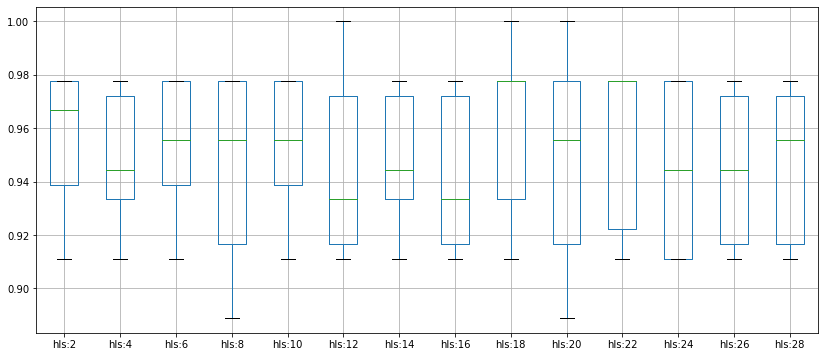

In [4]:
oneLayerDF.boxplot(figsize=(len(one_layer_sizes), 6))
oneLayerDF.describe()

## Explorando 2 camadas ocultas

In [5]:
# Declarando intervalo dos valores de camada oculta
two_layer_sizes = np.array([(layer1, layer2) for layer1 in np.arange(2, 21, 3) for layer2 in np.arange(2, 21, 3)])

# Declarando array com sementes para reprodutibilidade da distribuição
seed_array2 = np.random.randint(0, 9000, 10)

print(f'seeds: {seed_array2};\nhidden_layer_sizes:\n{two_layer_sizes};')

# Declarando lista com arrays de acurácia para cada camada
two_layer_acc = []

for hidden_layer in two_layer_sizes:
    # Declarando lista para armazenar acurácias de cada rodada
    acc = []

    # Rodadas de classificação
    for seed in seed_array2:
        # Distribuindo os dados
        X_pre_train, X_pre_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)

        # Instanciando Standard Scaler
        sc = StandardScaler().fit(X_pre_train)

        # Pré-processando dados
        X_train = sc.transform(X_pre_train)
        X_test = sc.transform(X_pre_test)

        # Instanciando e treinando classificador
        classifier = MLPClassifier(
            hidden_layer_sizes=hidden_layer,
            solver='lbfgs',
            activation='tanh'
        ).fit(
            X_train,
            y_train
        )

        # Gerando resultados e adicionando à lista
        acc.append(classifier.score(X_test, y_test))
    
    two_layer_acc.append(acc)

twoLayerDF = pd.DataFrame(
    data=np.array(two_layer_acc),
    index=np.array([f'hls:{hidden_layer}' for hidden_layer in two_layer_sizes])
).transpose()

twoLayerDF.transpose()

seeds: [1882 8680 5971 1517 4528 5358 2069 2568 6813 8515];
hidden_layer_sizes:
[[ 2  2]
 [ 2  5]
 [ 2  8]
 [ 2 11]
 [ 2 14]
 [ 2 17]
 [ 2 20]
 [ 5  2]
 [ 5  5]
 [ 5  8]
 [ 5 11]
 [ 5 14]
 [ 5 17]
 [ 5 20]
 [ 8  2]
 [ 8  5]
 [ 8  8]
 [ 8 11]
 [ 8 14]
 [ 8 17]
 [ 8 20]
 [11  2]
 [11  5]
 [11  8]
 [11 11]
 [11 14]
 [11 17]
 [11 20]
 [14  2]
 [14  5]
 [14  8]
 [14 11]
 [14 14]
 [14 17]
 [14 20]
 [17  2]
 [17  5]
 [17  8]
 [17 11]
 [17 14]
 [17 17]
 [17 20]
 [20  2]
 [20  5]
 [20  8]
 [20 11]
 [20 14]
 [20 17]
 [20 20]];


,0,1,2,3,4,5,6,7,8,9
hls:[2 2],0.977778,0.933333,1.000000,0.955556,0.888889,0.977778,0.977778,0.977778,0.666667,0.933333
hls:[2 5],0.955556,1.000000,1.000000,0.955556,0.888889,0.977778,1.000000,0.977778,0.977778,0.933333
hls:[2 8],0.977778,0.955556,0.955556,0.955556,0.888889,0.977778,0.977778,0.977778,0.977778,0.977778
hls:[ 2 11],0.977778,0.933333,0.977778,0.955556,0.888889,0.911111,0.955556,0.977778,0.977778,0.911111
hls:[ 2 14],0.955556,0.955556,0.977778,0.955556,0.888889,0.977778,0.977778,0.977778,0.977778,0.933333
hls:[ 2 17],0.955556,1.000000,0.955556,0.866667,0.888889,0.977778,0.977778,0.977778,0.977778,0.933333
hls:[ 2 20],0.977778,0.955556,0.977778,0.933333,0.866667,0.977778,1.000000,0.977778,0.977778,0.933333
hls:[5 2],0.933333,0.977778,0.977778,0.933333,0.888889,0.933333,0.911111,0.977778,0.977778,0.955556
hls:[5 5],0.911111,0.955556,0.955556,0.933333,0.866667,0.933333,0.977778,0.977778,0.977778,0.933333
hls:[5 8],0.977778,0.977778,0.977778,0.933333,0.888889,0.933333,0.977778,0.977778,0.977778,0.977778


,count,mean,std,min,25%,50%,75%,max
hls:[2 2],10.0,0.928889,0.097598,0.666667,0.933333,0.966667,0.977778,1.000000
hls:[2 5],10.0,0.966667,0.035136,0.888889,0.955556,0.977778,0.994444,1.000000
hls:[2 8],10.0,0.962222,0.027815,0.888889,0.955556,0.977778,0.977778,0.977778
hls:[ 2 11],10.0,0.946667,0.033457,0.888889,0.916667,0.955556,0.977778,0.977778
hls:[ 2 14],10.0,0.957778,0.028593,0.888889,0.955556,0.966667,0.977778,0.977778
hls:[ 2 17],10.0,0.951111,0.042937,0.866667,0.938889,0.966667,0.977778,1.000000
hls:[ 2 20],10.0,0.957778,0.038419,0.866667,0.938889,0.977778,0.977778,1.000000
hls:[5 2],10.0,0.946667,0.031774,0.888889,0.933333,0.944444,0.977778,0.977778
hls:[5 5],10.0,0.942222,0.035058,0.866667,0.933333,0.944444,0.972222,0.977778
hls:[5 8],10.0,0.960000,0.031076,0.888889,0.944444,0.977778,0.977778,0.977778


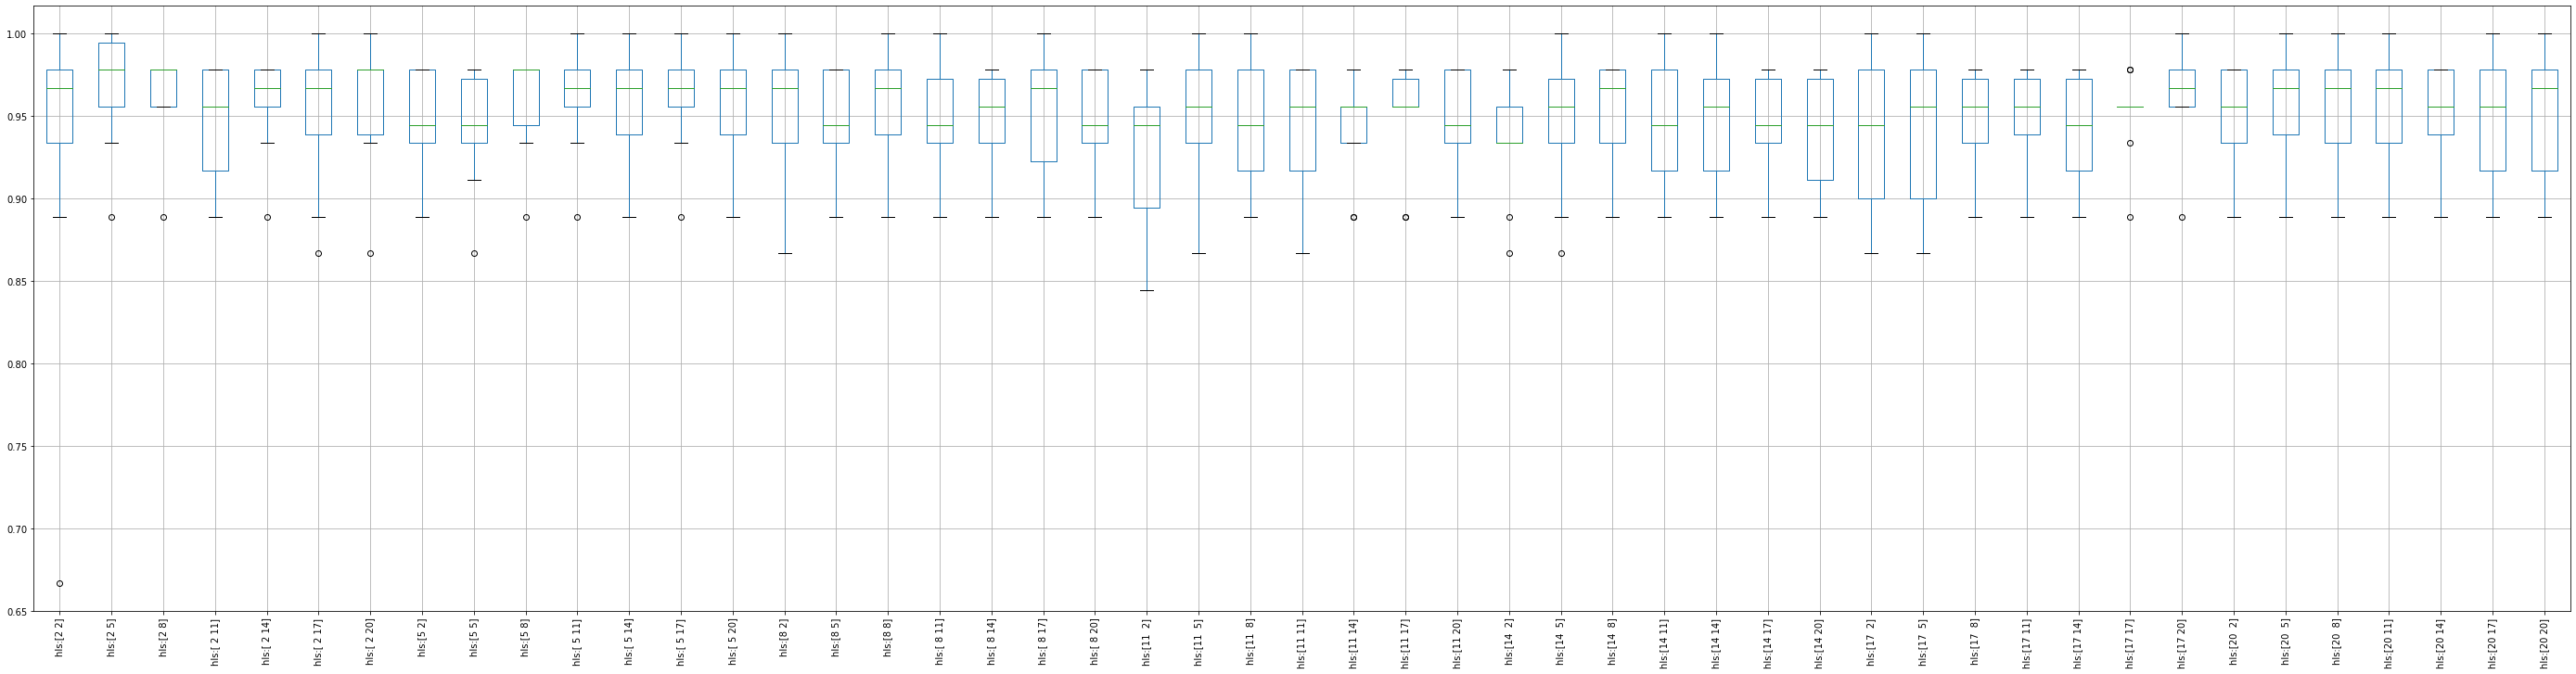

In [6]:
twoLayerDF.boxplot(figsize=(len(two_layer_sizes), 12), rot=90)
twoLayerDF.describe().transpose()

## Explorando 3 camadas ocultas

In [7]:
# Declarando intervalo dos valores de camada oculta
three_layer_sizes = np.array([(layer1, layer2, layer3) for layer1 in np.arange(2, 22, 5) for layer2 in np.arange(2, 22, 5) for layer3 in np.arange(2, 22, 5)])

# Declarando array com sementes para reprodutibilidade da distribuição
seed_array3 = np.random.randint(0, 9000, 10)

print(f'seeds: {seed_array3};\nhidden_layer_sizes:\n{three_layer_sizes};')

# Declarando lista com arrays de acurácia para cada camada
three_layer_acc = []

for hidden_layer in three_layer_sizes:
    # Declarando lista para armazenar acurácias de cada rodada
    acc = []

    # Rodadas de classificação
    for seed in seed_array3:
        # Distribuindo os dados
        X_pre_train, X_pre_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)

        # Instanciando Standard Scaler
        sc = StandardScaler().fit(X_pre_train)

        # Pré-processando dados
        X_train = sc.transform(X_pre_train)
        X_test = sc.transform(X_pre_test)

        # Instanciando e treinando classificador
        classifier = MLPClassifier(
            hidden_layer_sizes=hidden_layer,
            solver='lbfgs',
            activation='tanh'
        ).fit(
            X_train,
            y_train
        )

        # Gerando resultados e adicionando à lista
        acc.append(classifier.score(X_test, y_test))
    
    three_layer_acc.append(acc)

threeLayerDF = pd.DataFrame(
    data=np.array(three_layer_acc),
    index=np.array([f'hls:{hidden_layer}' for hidden_layer in three_layer_sizes])
).transpose()

threeLayerDF.transpose()

seeds: [1434  547 3595 8052 3938 7424 5375  869  798 8026];
hidden_layer_sizes:
[[ 2  2  2]
 [ 2  2  7]
 [ 2  2 12]
 [ 2  2 17]
 [ 2  7  2]
 [ 2  7  7]
 [ 2  7 12]
 [ 2  7 17]
 [ 2 12  2]
 [ 2 12  7]
 [ 2 12 12]
 [ 2 12 17]
 [ 2 17  2]
 [ 2 17  7]
 [ 2 17 12]
 [ 2 17 17]
 [ 7  2  2]
 [ 7  2  7]
 [ 7  2 12]
 [ 7  2 17]
 [ 7  7  2]
 [ 7  7  7]
 [ 7  7 12]
 [ 7  7 17]
 [ 7 12  2]
 [ 7 12  7]
 [ 7 12 12]
 [ 7 12 17]
 [ 7 17  2]
 [ 7 17  7]
 [ 7 17 12]
 [ 7 17 17]
 [12  2  2]
 [12  2  7]
 [12  2 12]
 [12  2 17]
 [12  7  2]
 [12  7  7]
 [12  7 12]
 [12  7 17]
 [12 12  2]
 [12 12  7]
 [12 12 12]
 [12 12 17]
 [12 17  2]
 [12 17  7]
 [12 17 12]
 [12 17 17]
 [17  2  2]
 [17  2  7]
 [17  2 12]
 [17  2 17]
 [17  7  2]
 [17  7  7]
 [17  7 12]
 [17  7 17]
 [17 12  2]
 [17 12  7]
 [17 12 12]
 [17 12 17]
 [17 17  2]
 [17 17  7]
 [17 17 12]
 [17 17 17]];


,0,1,2,3,4,5,6,7,8,9
hls:[2 2 2],0.977778,0.955556,1.000000,0.955556,0.911111,0.977778,0.977778,0.955556,0.644444,0.955556
hls:[2 2 7],0.977778,0.955556,0.911111,0.955556,0.888889,0.977778,0.911111,0.955556,0.888889,0.933333
hls:[ 2 2 12],0.977778,0.933333,0.977778,0.933333,0.911111,0.955556,0.933333,0.955556,0.888889,0.955556
hls:[ 2 2 17],0.977778,0.955556,0.977778,0.955556,0.911111,0.977778,0.933333,0.911111,0.888889,0.955556
hls:[2 7 2],0.933333,0.955556,0.977778,0.955556,0.644444,0.955556,1.000000,0.955556,0.933333,0.955556
...,...,...,...,...,...,...,...,...,...,...
hls:[17 12 17],0.955556,0.955556,0.933333,0.955556,0.911111,0.911111,0.933333,0.911111,0.866667,0.955556
hls:[17 17 2],0.955556,0.955556,0.955556,0.955556,0.911111,0.977778,0.888889,0.911111,0.888889,0.955556
hls:[17 17 7],0.977778,0.955556,0.911111,0.955556,0.933333,0.911111,0.977778,0.888889,0.955556,0.955556
hls:[17 17 12],0.977778,0.955556,1.000000,0.933333,0.911111,0.933333,0.933333,0.911111,0.866667,0.955556


,count,mean,std,min,25%,50%,75%,max
hls:[2 2 2],10.0,0.931111,0.103412,0.644444,0.955556,0.955556,0.977778,1.000000
hls:[2 2 7],10.0,0.935556,0.033864,0.888889,0.911111,0.944444,0.955556,0.977778
hls:[ 2 2 12],10.0,0.942222,0.028109,0.888889,0.933333,0.944444,0.955556,0.977778
hls:[ 2 2 17],10.0,0.944444,0.031860,0.888889,0.916667,0.955556,0.972222,0.977778
hls:[2 7 2],10.0,0.926667,0.101051,0.644444,0.938889,0.955556,0.955556,1.000000
...,...,...,...,...,...,...,...,...
hls:[17 12 17],10.0,0.928889,0.029257,0.866667,0.911111,0.933333,0.955556,0.955556
hls:[17 17 2],10.0,0.935556,0.032203,0.888889,0.911111,0.955556,0.955556,0.977778
hls:[17 17 7],10.0,0.942222,0.029998,0.888889,0.916667,0.955556,0.955556,0.977778
hls:[17 17 12],10.0,0.937778,0.037479,0.866667,0.916667,0.933333,0.955556,1.000000


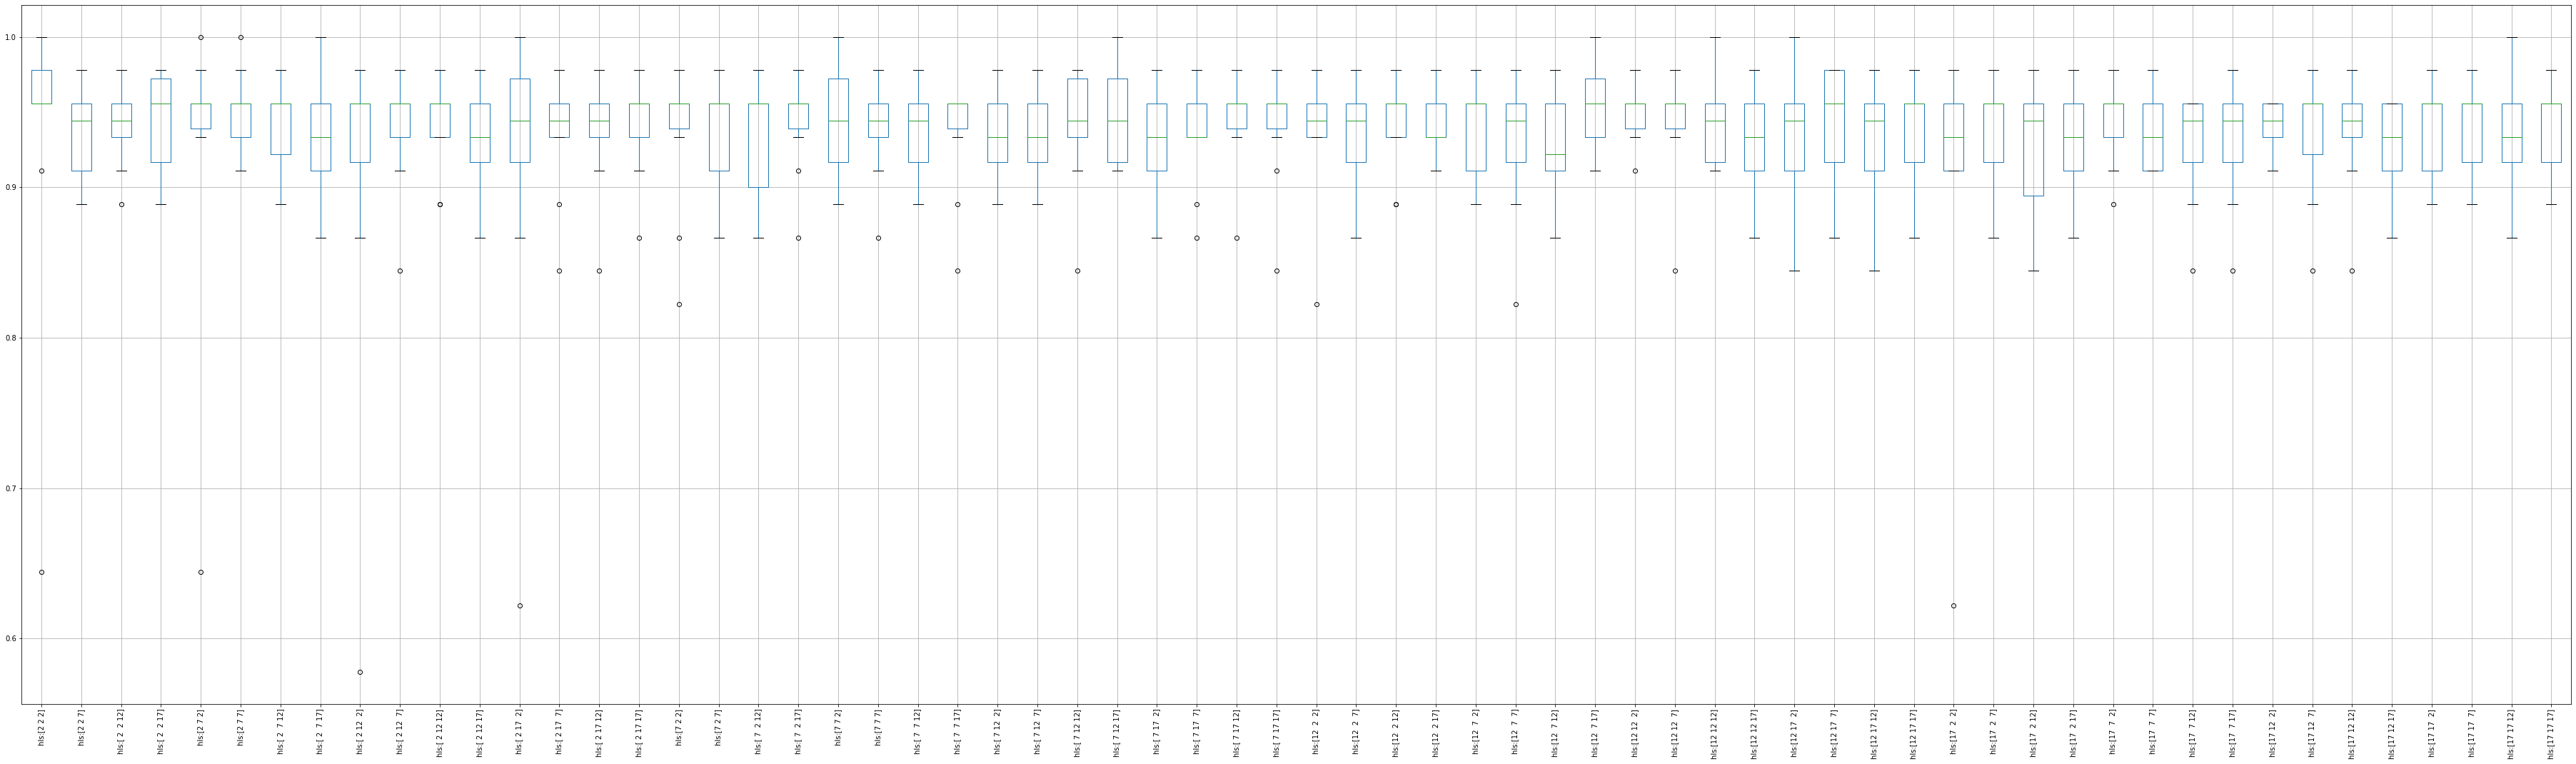

In [8]:
threeLayerDF.boxplot(figsize=(len(three_layer_sizes), 18), rot=90)
threeLayerDF.describe().transpose().head(64)